In [1]:
path = r"G:\target_strength\2020_08_12_TS\*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [2]:
filelist = glob(path)
filelist

['G:\\target_strength\\2020_08_12_TS\\0424_AI0_chirp_9.3m_with_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\0520_AI0_chirp_9.3m_without_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\0941_AI0_chirp_52m_with_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\1152_AI0_chirp_52m_without_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\1158_AI0_chirp_53m_without_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\1214_AI0_chirp_53m_with_target.wav']

In [3]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
# %matplotlib notebook
import os

In [4]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
        title = self.file.split('\\')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.values = self.values-np.mean(self.values)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=0
        end_skip=0
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [5]:
filelist

['G:\\target_strength\\2020_08_12_TS\\0424_AI0_chirp_9.3m_with_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\0520_AI0_chirp_9.3m_without_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\0941_AI0_chirp_52m_with_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\1152_AI0_chirp_52m_without_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\1158_AI0_chirp_53m_without_target.wav',
 'G:\\target_strength\\2020_08_12_TS\\1214_AI0_chirp_53m_with_target.wav']

In [38]:
tank = SL(filelist[4])
tank.readWavFileToArray()
# tank.plot()

title: AI0_chirp
total lenght: 20525000, time duration: 200


total sound generated: 59


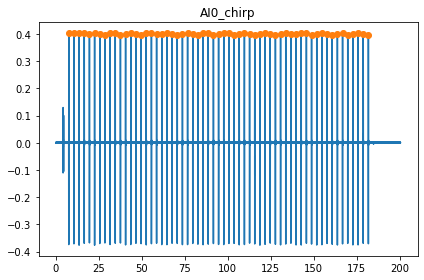

In [39]:
tank.findPeakIndex(0.3)
tank.plotWithPeak()
# b.calculateSL()

In [40]:
index_tank = tank.getIndex()
data_tank = tank.getData()

In [41]:
target = SL(filelist[5])
target.readWavFileToArray()
# target.plot()

title: AI0_chirp
total lenght: 20100000, time duration: 196


total sound generated: 59


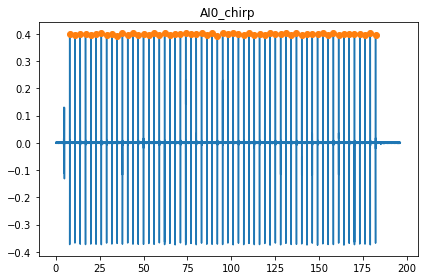

In [42]:
target.findPeakIndex(0.3)
target.plotWithPeak()
# b.calculateSL()

In [43]:
index_target = target.getIndex()
data_target = target.getData()

In [44]:
fs = 102400

os_path = r"G:\python_work\03_target_strength\fig\2020_08_11"
os.chdir(os_path)

for i in range(len(index_tank)):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    
    
    tank = data_tank[start_tank:end_tank]
    fig, ax = plt.subplots()
    time = np.arange(len(tank))/fs
    ax.plot(time, tank)
    ax.set_title("chirp number {}".format(i+119))
    ax.set_xlabel("Time(s)")
    ax.set_ylabel("Voltage(v)")
    fig.savefig('index_{}.png'.format(i+119))
    plt.close()

In [45]:
len(index_target)

59

In [46]:
fs = 102400

os_path = r"G:\python_work\03_target_strength\fig\2020_08_11"
os.chdir(os_path)

for i in range(len(index_target)):
    start_target = int(index_target[i]-0.0005*fs)
    end_target = int(start_target + fs*0.001)
    
    
    tank = data_target[start_target:end_target]
    fig, ax = plt.subplots()
    time = np.arange(len(tank))/fs
    ax.plot(time, tank)
    ax.set_title("chirp number {}".format(i+178))
    ax.set_xlabel("Time(s)")
    ax.set_ylabel("Voltage(v)")
    fig.savefig('index_{}.png'.format(i+178))
    plt.close()

In [47]:
average_temp = average

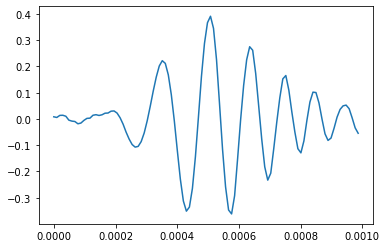

In [48]:
fs = 102400
count = int(fs*0.001)
average = np.zeros(count)
for i in range(len(index_target)):
    start_target = int(index_target[i]-0.0005*fs)
    end_target = int(start_target + fs*0.001)
    target = data_target[start_target:end_target]
    average = average + target
for i in range(len(index_tank)):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    tank = data_tank[start_tank:end_tank]
    average = average + target
fig, ax = plt.subplots()
average = (average/(len(index_tank)+len(index_target))+average_temp)/2
time = np.arange(len(average))/fs
ax.plot(time, average)

In [49]:
# power_list = []
power_list = list(np.load("error.npy"))
for i in range(len(index_target)):
    start_target = int(index_target[i]-0.0005*fs)
    end_target = int(start_target + fs*0.001)
    target = data_target[start_target:end_target]
    diff = target-average
    power_list.append(np.sum(diff*diff))
for i in range(len(index_tank)):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    tank = data_tank[start_tank:end_tank]
    diff = tank - average
    power_list.append(np.sum(diff*diff))

In [50]:
len(power_list)

237

In [51]:
np.save("error", np.array(power_list))

Text(0.3, 0.65, 'stdev=0.0444, mean=0.0488')

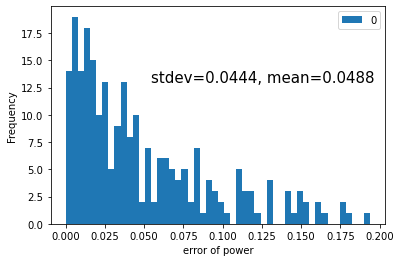

In [52]:
import statistics
import pandas as pd
statistic_list = power_list

std = statistics.stdev(statistic_list)
mean = statistics.mean(statistic_list)

df = pd.DataFrame(statistic_list)
ax = df.plot.hist(bins=50)

s = "stdev={:.4f}, mean={:.4f}".format(std,mean)
# ax.set_xlabel("Source level(dB re 1upa)")
ax.set_xlabel("error of power")
ax.text(0.3, 0.65, s=s, transform=ax.transAxes, fontsize=15)

In [24]:
def rms(x):
    return np.sqrt(np.mean(x*x))

In [25]:
def compute_SL(x):
    sen = -207
    r = rms(x)
    sl = 20*math.log10(r)-sen
    return sl

In [54]:
# sl_list = []
sl_list = list(np.load("sl.npy"))
for i in range(len(index_target)):
    start_target = int(index_target[i]-0.0005*fs)
    end_target = int(start_target + fs*0.001)
    target = data_target[start_target:end_target]
    sl = compute_SL(target)
    sl_list.append(sl)
for i in range(len(index_tank)):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    tank = data_tank[start_tank:end_tank]
    sl = compute_SL(tank)
    sl_list.append(sl)

In [55]:
len(sl_list)

237

In [56]:
np.save("sl",np.array(sl_list))

Text(0.3, 0.65, 'stdev=0.177, mean=190.77')

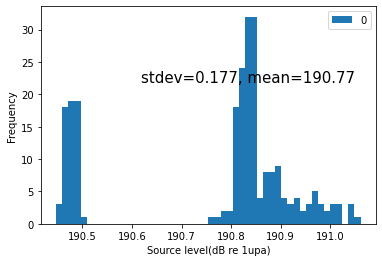

In [57]:
import statistics
import pandas as pd
statistic_list = sl_list

std = statistics.stdev(statistic_list)
mean = statistics.mean(statistic_list)

df = pd.DataFrame(statistic_list)
ax = df.plot.hist(bins=50)

s = "stdev={:.3f}, mean={:.2f}".format(std,mean)
ax.set_xlabel("Source level(dB re 1upa)")
# ax.set_xlabel("error of power")
ax.text(0.3, 0.65, s=s, transform=ax.transAxes, fontsize=15)